In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


In [2]:
raw_data = pd.read_csv('speedup.csv')
raw_data

,Benchmark,Baseline,LBPU,LTCU,Valkyrie
0,mt,0.01132,0.00790,0.009930,0.007510
1,mm,0.13430,0.09810,0.114000,0.110530
2,km,0.10840,0.08280,0.073500,0.054670
3,st,0.04646,0.04350,0.038700,0.036500
4,pr,0.10440,0.08570,0.075300,0.071800
5,spmv,0.11600,0.03210,0.080000,0.030500
6,flw,0.01300,0.01090,0.007810,0.007000
7,fir,0.00494,0.00494,0.004946,0.004946
8,bs,0.03490,0.03490,0.034900,0.034900
9,nw,1.00000,1.00000,1.000000,1.000000


In [3]:
stacked_data = raw_data
stacked_data['LBPU'] = stacked_data['Baseline']/stacked_data['LBPU']
stacked_data['LTCU'] = stacked_data['Baseline']/stacked_data['LTCU']
stacked_data['Valkyrie'] = stacked_data['Baseline']/stacked_data['Valkyrie']
stacked_data['Baseline'] = stacked_data['Baseline']/stacked_data['Baseline']


stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['Baseline', 'LBPU','LTCU','Valkyrie'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
#stacked_data = stacked_data.sort_values(['Benchmark'])
stacked_data.columns = ['Benchmark', 'Configuration', 'Speedup']

stacked_data


,Benchmark,Configuration,Speedup
0,MT,Baseline,1.000000
1,MM,Baseline,1.000000
2,KM,Baseline,1.000000
3,ST,Baseline,1.000000
4,PR,Baseline,1.000000
5,SPMV,Baseline,1.000000
6,FLW,Baseline,1.000000
7,FIR,Baseline,1.000000
8,BS,Baseline,1.000000
9,NW,Baseline,1.000000


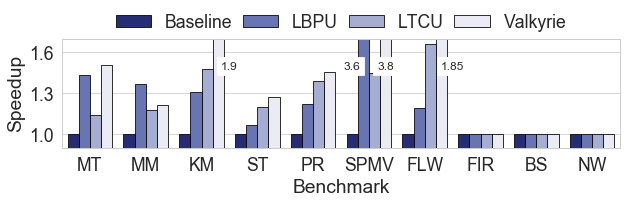

In [7]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='Speedup', 
            palette=['#1A237E','#5C6BC0','#9FA8DA', '#E8EAF6' ], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=4)
ax.set_ylim(0.9, 1.70)
ax.set_yticks([1.0, 1.3, 1.6])


ax.text(2.50, 1.5, 1.9,  horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white'))
ax.text(4.70, 1.5, 3.6,  horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white'))
ax.text(5.30, 1.5, 3.80,  horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white'))
ax.text(6.50, 1.5, 1.85,  horizontalalignment='center', verticalalignment='center',
        fontsize=12, bbox=dict(facecolor='white'))






plt.savefig('speedup.pdf', bbox_inches='tight')
plt.show()
plt.close()